# Set up environment

## Miniconda, biopython, openMM, pdbfixer

### install miniconda for Colab

ref: https://towardsdatascience.com/conda-google-colab-*75f7c867a522
- current python version: 3.6.9
- most recent compatible miniconda verison: 4.5.4

In [1]:
!which python
!python --version
!echo $PYTHONPATH

#remove python path to avoid conda warnings
%env PYTHONPATH=

/usr/local/bin/python
Python 3.7.10
/env/python
env: PYTHONPATH=


In [2]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget -nc https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-06-06 10:42:31--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-06-06 10:42:31--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 7.07M 8s
    50K .......... .......... .......... .......... ..........  0%

Check for correct installation:

In [3]:
# should return /usr/local/bin/conda
!which conda

# should return 4.5.4
!conda --version

#Miniconda actually installed a slightly different version of Python
!python --version

/usr/local/bin/conda
conda 4.5.4
Python 3.6.5 :: Anaconda, Inc.


### Update conda

...and all its dependencies to their most recent versions without updating Python to 3.7 (or 3.8), i.e. holding the Python version at 3.6.

Since miniconda has a new version (4.10) that prevents me from importing simtk, I have to ensure it only uses 4.9.2 version (the one this notebook was originally running with) and avoid automatic updates.

In [4]:
!conda install conda=4.9.2  --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [5]:
!conda --version

conda 4.9.2


In [6]:
!pip install tqdm

In [7]:
%%bash
conda install --channel defaults conda=4.9.2 python=3.6 --yes
conda update --channel defaults conda=4.9.2 --all --yes

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda=4.9.2
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotlipy-0.7.0             |py36h27cfd23_1003         320 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    cffi-1.14.0                |   py36h2e261b9_0         223 KB
    chardet-4.0.0              |py36h06a4308_1003         199 KB
    conda-4.9.2                |   py36h06a4308_0         2.9 MB
    conda-package-handling-1.7.3|   py36h27cfd23_1         882 KB
    cryptography-2.3.1         |   py36hc365091_0         514 KB
    pip-21.1.1      



==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




Check for correct update:

In [8]:
# now returns 4.9.2
!conda --version

# now returns Python 3.6.13 :: Anaconda, Inc.
!python --version 

conda 4.9.2
Python 3.6.13 :: Anaconda, Inc.


Any package that you install with Conda will be installed into the directory /usr/local/lib/python3.6/site-packages so you will need to add this directory to sys.path in order for these packages to be available for import.

Since the preinstalled packages included with Google Colab are installed into the /usr/local/lib/python3.6/dist-packages directory, which appears ahead, the version of a package available via Google Colab will take precedence over any version of the same package installed via Conda.

In [9]:
import sys
_ = (sys.path
        .append("/usr/local/lib/python3.6/site-packages"))

Install packages if necessary. include the --yes flag when installing your packages to avoid getting prompted to confirm the package plan.

In [10]:
# !conda install --channel conda-forge featuretools --yes

### Install bioptyhon, openMM, pdbfixer, neptune-client

In [11]:
!pip install biopython==1.78
# !conda install -c omnia openmm=7.3.1 -y
# !conda install -c omnia pdbfixer=1.5 -y

     |████████████████████████████████| 2.3 MB 8.0 MB/s 
     |████████████████████████████████| 14.8 MB 92.2 MB/s 


**Ensure openmm and pdbfixer .so (shared library) are called with proper name: (to run if there is a loading problem with these two packages)**

In [12]:
# !cp /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/simtk/openmm/_openmm.so
# !ls /usr/local/lib/python3.6/site-packages/simtk/openmm/

In [13]:
!cp /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.cpython-36m-x86_64-linux-gnu.so /usr/local/lib/python3.6/site-packages/Bio/Align/_aligners.so
!ls /usr/local/lib/python3.6/site-packages/Bio/Align

_aligners.c				   AlignInfo.py  __pycache__
_aligners.cpython-36m-x86_64-linux-gnu.so  Applications  substitution_matrices
_aligners.so				   __init__.py


Ensure 3.6.13 version

In [14]:
py_version = !python -V
assert py_version[0].split(" ::")[0].split("Python ")[1] == "3.6.13"

For using Bio.PDB.skdtrees module (C script), one needs to first compile it (to i.e. translate to machine code), precising which python header file (used by GCC to build applications) with -I flag. -fPIC for "Position Independent Code", which means that the generated machine code is not dependent on being located at a specific address in order to work (e.g. C jumps would be generated as relative rather than absolute).

Once compiled, create a shared library file (".so" extension).

In [15]:
# !gcc -I /usr/include/python3.6m/ -c -Wall -fPIC -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.c
# !gcc -o /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.so -shared /usr/local/lib/python3.6/site-packages/Bio/PDB/kdtrees.o

In [16]:
!pip install neptune-client

     |████████████████████████████████| 238 kB 7.9 MB/s 
     |████████████████████████████████| 97 kB 5.5 MB/s 
     |████████████████████████████████| 829 kB 13.3 MB/s 
     |████████████████████████████████| 146 kB 27.4 MB/s 
     |████████████████████████████████| 9.5 MB 18.0 MB/s 
     |████████████████████████████████| 3.0 MB 83.9 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 166 kB 92.6 MB/s 
     |████████████████████████████████| 40 kB 6.8 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 640 kB 65.8 MB/s 
     |████████████████████████████████| 272 kB 72.0 MB/s 
     |████████████████████████████████| 227 kB 103.0 MB/s 
     |████████████████████████████████| 127 kB 101.6 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
     |████████████████████████████████| 56 kB 5.4 MB/s 
     |████████████████████████████████| 510 kB 68.4 MB/s 
     |███████████████████

## Mount drive

In [17]:
# Mount drive
from google.colab import drive

to_mount = True
while to_mount:
    try:
        drive.mount('/content/gdrive/', force_remount=True)
        to_mount=False
    except ValueError:
        print("New attempt to mount.")
        pass

Mounted at /content/gdrive/


## Import packages, modules

In [18]:
import glob
import os
import random
import timeit
import re
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import torch
import torchvision

import Bio.SeqIO
import Bio.PDB

# Packages for parsing and investigate PDB files
# import pdbfixer
# import simtk
# import simtk.openmm
# import simtk.openmm.app
# import simtk.unit

# Utility packages
from getpass import getpass
from IPython.display import Audio
import smtplib
import ssl
import tqdm.notebook as tqdm
import traceback
import inspect

os.chdir("gdrive/My Drive/thesis/")

# For consistency:
random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

import tested_double_cav_models as test

# Personal modules
# from neptune.cavity_model import (
#     CavityModel,
#     ResidueEnvironment,
#     ResidueEnvironmentsDataset,
#     DownstreamModel,
#     ToTensor,
#     DDGDataset,
#     DDGToTensor,
#     DownstreamModel,
# )

# from neptune.helpers import (
#     _augment_with_reverse_mutation,
#     _populate_dfs_with_nlls_and_nlfs,
#     _populate_dfs_with_resenvs,
#     _train_loop,
#     _train_val_split,
#     _get_ddg_training_dataloaders,
#     _get_ddg_validation_dataloaders,
#     _train_downstream_and_evaluate,
#     _predict_with_downstream,
#     _eval_loop,
#     _test_cavity_model,
# )

# from visualization import (
#     plot_training_history,
#     plot_training_history_v2,
#     show_respair_acc_heatmap,
# )

In [19]:
from visualization import (
    plot_training_history,
    plot_training_history_v2,
    show_respair_acc_heatmap,
)

In [20]:
from log_to_neptune import (
    set_and_save_metadata,
    log_metadata_to_neptune,
    convert_plt_to_plotly
)

# import modules/packages

## Visualization

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pickle
from typing import Union
import Bio.PDB


def plot_training_history_v2(
    model_name: str,
    folder:str="models/double_cav_models/",
    return_figs=False):
    """
    Plot the results of the training with the metrics saved in a pickle file 
    with naming scheme '{folder}/metrics_{model_name}.pickle'.
    """
    with open(f"{folder}/metrics_{model_name}.pickle", "rb") as f:
        history = pickle.load(f)

    history.pop("best_epoch")

    history_loss = {}
    for mode in history:
        for key in history[mode]:
            if "loss" in key:
                history_loss[mode] = history[mode][key]
        history[mode].pop("loss")

    # Plot loss evolution:
    fig = plt.figure(figsize=(5, 4), constrained_layout=True)

    for mode in history_loss:
        n_records = len(history_loss[mode])
        plt.plot(range(0, n_records), history_loss[mode], label=mode)

    plt.xlabel("Epoch")
    plt.xticks(range(0, n_records+1, 2))
    plt.ylabel("Cross-Entropy Loss")
    legend = plt.legend(shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.grid(linestyle="-", alpha=0.5)

    fig_name = f"results/double_cav_models/training_model_{model_name}_loss.png"
    plt.savefig(fig_name, dpi=200, bbox_inches = "tight")
    plt.show()

    # Plot accuracy evolution:
    fig2 = plt.figure(figsize=(6.6, 4), constrained_layout=True)

    max_y = history["train"][max(history["train"], key=history["train"].get)]
    palette_iter = iter(sns.color_palette("bright", as_cmap=True))
    for mode, palette in zip(history, ["YlOrRd", "PuBuGn"]):
        train_colors = plt.get_cmap("YlOrRd")

        plt.plot(range(0, n_records), history[mode][f"acc_join"],
                label=f"{mode} (R1, R2)", color=next(palette_iter))
        plt.plot(range(0, n_records), history[mode][f"acc_res1"],
                label=f"{mode} R1", color=next(palette_iter))
        plt.plot(range(0, n_records), history[mode][f"acc_res2"],
                label=f"{mode} R2", color=next(palette_iter))
        plt.plot(range(0, n_records), history[mode][f"acc_res2_given_res1"],
                label=f"{mode} R2 | R1", color=next(palette_iter), linestyle="--")
        plt.plot(range(0, n_records), history[mode][f"acc_res1_given_res2"],
                label=f"{mode} R1 | R2", color=next(palette_iter), linestyle="--")

    plt.xlabel("Epoch")
    plt.xticks(range(0, n_records+1, 2))
    plt.yticks(np.arange(0., max(max_y)+0.05, 0.05))

    plt.ylabel("Accuracy")
    legend = plt.legend(shadow=True,
                    loc='upper right',
                    bbox_to_anchor=(1.35, 1.02),
                    )
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')
    plt.grid(linestyle="-", alpha=0.5)

    fig2_name = f"results/double_cav_models/training_model_{model_name}_acc.png"
    plt.savefig(fig2_name, dpi=200, bbox_inches = "tight")
    plt.show()

    if return_figs:
        return (fig, fig_name, fig2, fig2_name)

## cavity_model

In [22]:
import glob
import os
import random
from typing import Callable, List, Union

import numpy as np
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset

import tqdm.notebook as tqdm

# public objects of that module that will be exported when from <module> import * is used on the module (overrides default _objects)


class ResidueEnvironment:
    """
    Residue environment class used to hold necessarry information about the
    atoms of the environment such as atomic coordinates, atom types and the
    class of the missing (non-central) TWO amino acids

    Parameters
    ----------
    xyz_coords: np.ndarray
        Numpy array with shape (n_atoms, 3) containing the x, y, z coordinates.
    atom_types: np.ndarray
        1D numpy array containing the atom types. Integer values in range(6).
    restypes_onehot: np.ndarray # -> TO DOUBLE
        Numpy array with shape (n_atoms, 21) containing the amino acid
        class of the missing amino acid
    chain_id: str
        Chain id associated to ResidueEnvironment object
    pdb_residue_number: int # -> TO DOUBLE
        Residue number associated with the ResidueEnvironment object
    pdb_id: str
        PDBID associated with the ResidueEnvironment object
    """

    def __init__(
        self,
        xyz_coords: np.ndarray,
        atom_types: np.ndarray,
        restype_onehot: np.ndarray,
        chain_id: str,
        pdb_residue_number: int,
        pdb_id: str,
    ):
        self._xyz_coords = xyz_coords
        self._atom_types = atom_types
        self._restype_onehot = restype_onehot # -> TO DOUBLE
        self._chain_id = chain_id
        self._pdb_residue_number = pdb_residue_number # -> TO DOUBLE
        self._pdb_id = pdb_id
        
    @property
    def xyz_coords(self):
        return self._xyz_coords

    @property
    def atom_types(self):
        return self._atom_types

    @property
    def restype_onehot(self):
        return self._restype_onehot

    @property
    def restype_index(self):
        return np.argmax(self.restype_onehot)
    
    @property
    def chain_id(self):
        return self._chain_id

    @property
    def pdb_residue_number(self):
        return self._pdb_residue_number

    @property
    def pdb_id(self):
        return self._pdb_id

    def __repr__(self):
        """
        Used to represent a classÃ¢â‚¬â„¢s objects as a string.
        Built-in fct for calling it: repr()
        """
        return (
            f"<ResidueEnvironment with {self.xyz_coords.shape[0]} atoms. " # it calls property self.xyz_coords
            f"pdb_id: {self.pdb_id}, "
            f"chain_id: {self.chain_id}, "
            f"pdb_residue_number: {self.pdb_residue_number}, " 
            f"restype_index: {self.restype_index}>"
        )


class ResidueEnvironmentsDataset(Dataset):
    """
    Residue environment dataset class

    Parameters
    ----------
    input_data: Union[List[str], List[ResidueEnvironment]]
        List of parsed pdb filenames in .npz format or list of
        ResidueEnvironment objects
    transform: Callable
        A to-tensor transformer class
    """

    def __init__(
        self,
        input_data: Union[List[str], List[ResidueEnvironment]], # Union[X, Y] means either X or Y
        transformer: Callable = None,
    ):
        if all(isinstance(x, ResidueEnvironment) for x in input_data):
            self._res_env_objects = input_data
        elif all(isinstance(x, str) for x in input_data):
            self._res_env_objects = self._parse_envs(input_data)
        else:
            raise ValueError(
                "Input data is not of type" "Union[List[str], List[ResidueEnvironment]]"
            )

        self._transformer = transformer

    @property
    def res_env_objects(self):
        return self._res_env_objects

    @property
    def transformer(self):
        return self._transformer

    @transformer.setter
    def transformer(self, transformer):
        """TODO: Think if a constraint to add later"""
        self._transformer = transformer

    def __len__(self):
        return len(self.res_env_objects)

    def __getitem__(self, idx):
        sample = self.res_env_objects[idx]
        if self.transformer:
            sample = self.transformer(sample)
        return sample

    def _parse_envs(self, npz_filenames: List[str]) -> List[ResidueEnvironment]:
        """
        TODO: Make this more readable
        """
        res_env_objects = []
        for i in tqdm.tnrange(len(npz_filenames)):
            coordinate_features = np.load(npz_filenames[i])
            atom_coords_prot_seq = coordinate_features["positions"] # atom coords
            restypes_onehots_prot_seq = coordinate_features["pair_aa_onehot"]
            selector_prot_seq = coordinate_features["selector"] # atom ids
            atom_types_flattened = coordinate_features["atom_types_numeric"]

            chain_ids = coordinate_features["chain_ids"]
            pdb_residue_numbers = coordinate_features["pair_res_indices"]
            chain_boundary_indices = coordinate_features["chain_boundary_indices"]

            pdb_id = os.path.basename(npz_filenames[i])[0:4]

            N_pair_residues = selector_prot_seq.shape[0] # WILL BECOME N_PAIRS!!

            for pair_res_i in range(N_pair_residues):
                # Get atom indexes
                selector = selector_prot_seq[pair_res_i]
                selector_masked = selector[selector > -1]  # Remove Filler -1
                
                # Get atom types
                atom_types = atom_types_flattened[selector_masked]
                
                # Get atom coordinates
                coords_mask = (
                    atom_coords_prot_seq[pair_res_i, :, 0] != -99.0 # for all its atoms, only need to check one column of coord for it (x here)
                )  # Remove filler
                coords = atom_coords_prot_seq[pair_res_i][coords_mask]
                
                # Get resi_evt ONE-HOT label (Target variable) -> TO DOUBLE
                restype_onehot = restypes_onehots_prot_seq[pair_res_i]
                
                # Get resi real id -> TO DOUBLE
                pdb_residue_number = pdb_residue_numbers[pair_res_i]
                
                # Locate chain id -> TO DOUBLE
                for j in range(len(chain_ids)):
                    chain_boundary_0 = chain_boundary_indices[j]
                    chain_boundary_1 = chain_boundary_indices[j + 1]
                    if pair_res_i in range(chain_boundary_0, chain_boundary_1):
                        chain_id = str(chain_ids[j])
                        break

                res_env_objects.append(
                    ResidueEnvironment(
                        coords,
                        atom_types,
                        restype_onehot, # -> TO DOUBLE
                        chain_id, # -> TO DOUBLE
                        pdb_residue_number, # -> TO DOUBLE
                        pdb_id,
                    )
                )

        return res_env_objects


class ToTensor:
    """
    To-tensor transformer

    Parameters
    ----------
    device: str
        Either "cuda" (gpu) or "cpu". Is set-able.
    """

    def __init__(self,
        device: str,
        unravel_index=True,
        reshape_index=True,
    ):
        self.device = device
        self.unravel_index = unravel_index
        self.reshape_index = reshape_index

    @property
    def device(self):
        return self.__device

    @device.setter
    def device(self, device):
        allowed_devices = ["cuda", "cpu"]
        if device in allowed_devices:
            self.__device = device
        else:
            raise ValueError(
                'chosen device "{device}" not in {allowed_devices}.')

    def __call__(self, sample: ResidueEnvironment,):
        """Converts single ResidueEnvironment object into x_ and y_"""

        sample_env = np.hstack(
            [np.reshape(sample.atom_types, [-1, 1]), sample.xyz_coords]
        )
        if self.reshape_index:
            return {
                "x_": torch.tensor(sample_env, dtype=torch.float32
                    ).to(self.device),
                "y_": self.reshape_pairres_indices(sample.restype_onehot,
                                                   n_aa_in=20,
                    ).to(self.device),
            }

        else:
            return {
                "x_": torch.tensor(sample_env, dtype=torch.float32
                    ).to(self.device),
                "y_": torch.tensor(sample.restype_onehot, dtype=torch.int8
                    ).to(self.device),
            }


    def reshape_pairres_indices(self, targets: np.array, n_aa_in=20, n_aa_out=20):
        """
        Convert pair_res onehot encoding to individual res encoding.
        array((n_pairs, n_aa_in*n_aa_in)) -> tensor((n_pairs, 2, n_aa_out*2))

        """

        indices = np.unravel_index(np.argmax(targets), shape=(n_aa_in,
                                                             n_aa_in))
        if self.unravel_index:
            one_hot_arr = torch.zeros((2, n_aa_out), dtype=torch.int8)
            one_hot_arr[0, indices[0]] = 1
            one_hot_arr[1, indices[1]] = 1
        else:
            one_hot_arr = torch.zeros((n_aa_out*n_aa_out), dtype=torch.int8)
            indices = np.ravel_multi_index(np.vstack(indices),
                                           dims=(n_aa_out, n_aa_out)
                                           )
            one_hot_arr[indices] = 1

        return one_hot_arr

    def collate_cat(self, batch: List[ResidueEnvironment]):
        """
        Collate method used by the dataloader to collate a
        batch of ResidueEnvironment objects.
        """
        target = torch.cat([torch.unsqueeze(b["y_"], 0) for b in batch], dim=0)

        # To collate the input, we need to add a column which
        # specifies the environment each atom belongs to = its evt (in the radius zone or the res)!!! So we add an evt "pseudo_id in the batch"
        env_id_batch = []
        for i, b in enumerate(batch): # b is one protein in the batch
            n_atoms = b["x_"].shape[0]
            env_id_arr = torch.zeros(n_atoms, dtype=torch.float32).to(self.device) + i # i is this pseudo_id, to device to be in the same device ax x
            env_id_batch.append(
                torch.cat([torch.unsqueeze(env_id_arr, 1), b["x_"]], dim=1) # add one column
            )
        data = torch.cat(env_id_batch, dim=0) # stack all the proteins'atoms on x axis

        return data, target

#     def collate_wrapper(self, batch):
#         return ResidueEnvironmentsBatch(batch, self.device)

# class ResidueEnvironmentsBatch:
#     def __init__(self, batch: List[ResidueEnvironment], device):
#         self.device = device
#         self.target = torch.cat([torch.unsqueeze(b["y_"], 0) for b in batch], dim=0)
#         # To collate the input, we need to add a column which
#         # specifies the environment each atom belongs to = its evt (in the radius zone or the res)!!! So we add an evt "pseudo_id in the batch"
#         env_id_batch = []
#         for i, b in enumerate(batch): # b is one protein in the batch
#             n_atoms = b["x_"].shape[0]
#             env_id_arr = torch.zeros(n_atoms, dtype=torch.float32).to(self.device) + i # i is this pseudo_id
#             env_id_batch.append(
#                 torch.cat([torch.unsqueeze(env_id_arr, 1), b["x_"]], dim=1) # add one column
#             )
#         self.input = torch.cat(env_id_batch, dim=0) # stack all the proteins'atoms on x axis

#     # custom memory pinning method on custom type
#     def pin_memory(self):
#         self.input = self.input.pin_memory()
#         self.target = self.target.pin_memory()
#         return self


class CavityModel(torch.nn.Module):
    """
    3D convolutional neural network to missing amino acid classification

    Parameters
    ----------
    device: str
        Either "cuda" (gpu) or "cpu". Is set-able.
    n_atom_types: int
        Number of atom types. (C, H, N, O, S, P)
    bins_per_angstrom: float
        Number of grid points per Angstrom.
    grid_dim: int
        Grid dimension
    sigma: float
        Standard deviation used for gaussian blurring
    """

    def __init__(
        self,
        device: str,
        n_atom_types: int = 6,
        bins_per_angstrom: float = 1.0,
        grid_dim_xy: int = 8, # because 9 Angstrom of radius
        grid_dim_z: int = 16,
        sigma: float = 0.6,
    ):

        super().__init__()

        self.device = device
        self._n_atom_types = n_atom_types
        self._bins_per_angstrom = bins_per_angstrom
        self._grid_dim_xy = grid_dim_xy
        self._grid_dim_z = grid_dim_z
        self._sigma = sigma

        self._model()

    @property
    def device(self):
        return self.__device

    @device.setter
    def device(self, device):
        allowed_devices = ["cuda", "cpu"]
        if device in allowed_devices:
            self.__device = device
        else:
            raise ValueError('chosen device "{device}" not in {allowed_devices}')

    @property
    def n_atom_types(self):
        return self._n_atom_types

    @property
    def bins_per_angstrom(self):
        return self._bins_per_angstrom

    @property
    def grid_dim_xy(self):
        return self._grid_dim_xy

    @property
    def grid_dim_z(self):
        return self._grid_dim_z

    @property
    def sigma(self):
        return self._sigma

    @property
    def sigma_p(self):
        return self.sigma * self.bins_per_angstrom

    @property
    def lin_spacing_xy(self):
        lin_spacing_xy = np.linspace(
            start=-self.grid_dim_xy / 2 * self.bins_per_angstrom 
            + self.bins_per_angstrom / 2,
            stop=self.grid_dim_xy / 2 * self.bins_per_angstrom
            - self.bins_per_angstrom / 2,
            num=self.grid_dim_xy,
        )
        return lin_spacing_xy

    @property
    def lin_spacing_z(self):
        lin_spacing_z = np.linspace(
            start=-self.grid_dim_z / 2 * self.bins_per_angstrom 
            + self.bins_per_angstrom / 2,
            stop=self.grid_dim_z / 2 * self.bins_per_angstrom
            - self.bins_per_angstrom / 2,
            num=self.grid_dim_z,
        )
        return lin_spacing_z

    def _model(self):
        self.xx, self.yy, self.zz = torch.tensor(
            np.meshgrid(
                self.lin_spacing_xy, self.lin_spacing_xy, self.lin_spacing_z, indexing="ij" # matrix indexing (classic python)
            ),
            dtype=torch.float32,
        ).to(self.device) # normally, already on "cuda"

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv3d(6, 16, kernel_size=(3, 3, 3), padding=1), # output = [100, 16, 4, 4 ,8]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(16),
            torch.nn.ReLU(),
        )

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=1), # usual: padding = round(kernel_size/2, lower), output = [100, 32, 2, 2, 4]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(32),
            torch.nn.ReLU(),
        )
        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1), # output = [100, 128, 1, 1, 2]
            torch.nn.MaxPool3d(kernel_size=2),
            torch.nn.BatchNorm3d(64),
            torch.nn.ReLU(),
            torch.nn.Flatten(),
        )
        self.dense1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=128, out_features=256), # bachnorm filters 64 * 4 parameters of batch norm per filter
            torch.nn.BatchNorm1d(256),
            torch.nn.ReLU(),
        )
        self.dense2 = torch.nn.Linear(in_features=256, out_features=40)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self._gaussian_blurring(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.dense1(x)
        x = self.dense2(x) # yields logits, mapped to probabilities afterwards by the Softmax fct.
        return x

    def _gaussian_blurring(self, x: torch.Tensor) -> torch.Tensor: # increase the resolution of the signal, reduce noises by blurring/smoothing intensity transitions of densities for each channel of atom type.
        """
        Method that takes 2d torch.Tensor describing the atoms of the batch.

        Parameters
        ----------
        x: torch.Tensor
            Tensor for shape (n_atoms, 5). Each row represents an atom, where:
                column 0 describes the environment of the batch the
                atom belongs to
                column 1 describes the atom type
                column 2,3,4 are the x, y, z coordinates, respectively

        Returns
        -------
        fields_torch: torch.Tensor
            Represents the structural environment (density val in 3d meshgrid)
            with gaussian blurring and has shape (-1, 6, self.grid_dim_xy,
                                                         self.grid_dim_xy,
                                                         self.grid_dim_z).
        """
        current_batch_size = torch.unique(x[:, 0]).shape[0]
        fields_torch = torch.zeros(
            (
                current_batch_size,
                self.n_atom_types,
                self.grid_dim_xy,
                self.grid_dim_xy,
                self.grid_dim_z,
            )
        ).to(self.device)
        for j in range(self.n_atom_types): # per batch
            mask_j = x[:, 1] == j
            atom_type_j_data = x[mask_j] # select all atoms of that type
            if atom_type_j_data.shape[0] > 0:
            # Fancy broadcasting:
            # reshaped_.xx.shape = (8*8*16, 1) : flattened x coordinates
            # pos[:, 0].shape = (n_atom_j, 1)
            # -> (reshaped_xx - pos[:, 0]).shape = (8*8*16, n_atom_j) : flattened density values, x axis contribution
                pos = atom_type_j_data[:, 2:]
                density = torch.exp(
                    -(
                        (torch.reshape(self.xx, [-1, 1]) - pos[:, 0]) ** 2
                        + (torch.reshape(self.yy, [-1, 1]) - pos[:, 1]) ** 2
                        + (torch.reshape(self.zz, [-1, 1]) - pos[:, 2]) ** 2
                    )
                    / (2 * self.sigma_p ** 2)
                )

                # Normalize each atom density to 1 (over whole batch), atom being x axis (dim=0)
                density /= torch.sum(density, dim=0)

                # Since column 0 of atom_type_j_data is SORTED
                # I can use a trick to detect the boundaries of environment based
                # on the change from one value to another.
                change_mask_j = (
                    atom_type_j_data[:, 0][:-1] != atom_type_j_data[:, 0][1:] # when !=, that means the previous and next indexes are the limits
                )

                # Add begin and end indices
                ranges_i = torch.cat(
                    [
                        torch.tensor([0]), # we start from 0
                        torch.arange(atom_type_j_data.shape[0] - 1)[change_mask_j] + 1,
                        torch.tensor([atom_type_j_data.shape[0]]), # we must end with the last environment for sure
                    ]
                )

                # Fill tensor, for each residual environment (i) of the batch
                for i in range(ranges_i.shape[0]):
                    if i < ranges_i.shape[0] - 1:
                        index_0, index_1 = ranges_i[i], ranges_i[i + 1]
                        fields = torch.reshape(
                            torch.sum(density[:, index_0:index_1], dim=1), # densities of the res_evt voxel
                            [self.grid_dim_xy, self.grid_dim_xy, self.grid_dim_z], # get back rectangular cuboid shape
                        )
                        fields_torch[i, j, :, :, :] = fields # density for that voxel
        return fields_torch


class DownstreamModel(torch.nn.Module):
    """
    Simple Downstream FC neural network with 1 hidden layer.
    """

    def __init__(self):
        super().__init__()

        # Model
        self.lin1 = torch.nn.Sequential(
            torch.nn.Linear(44, 10),
            torch.nn.ReLU(),
        )
        self.lin2 = torch.nn.Sequential(
            torch.nn.Linear(10, 10),
            torch.nn.ReLU(),
        )
        self.lin3 = torch.nn.Linear(10, 1)

    def forward(self, x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.lin3(x)
        return x


class DDGDataset(Dataset):
    """
    ddG dataset
    """

    def __init__(
        self,
        df: pd.DataFrame,
        transformer: Callable = None,
    ):

        self._df = df
        self.transformer = transformer

    @property
    def df(self):
        return self._df

    @property
    def transformer(self):
        return self._transformer

    @transformer.setter
    def transformer(self, transformer):
        """TODO: Think if a constraint to add later"""
        self._transformer = transformer

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        sample = self.df.iloc[idx]
        if self.transformer:
            sample = self.transformer(sample)
        return sample


class DDGToTensor:
    """
    To-tensor transformer for ddG dataframe data
    """

    def __call__(self, sample: pd.Series):
        wt_onehot = np.zeros(20)
        wt_onehot[sample["wt_idx"]] = 1.0
        mt_onehot = np.zeros(20)
        mt_onehot[sample["mt_idx"]] = 1.0

        x_ = torch.cat(
            [
                torch.Tensor(wt_onehot),
                torch.Tensor(mt_onehot),
                torch.Tensor(
                    [
                        sample["wt_nll"],
                        sample["mt_nll"],
                        sample["wt_nlf"],
                        sample["mt_nlf"],
                    ]
                ),
            ]
        )

        return {"x_": x_, "y_": sample["ddg"]}

## independence helper

In [ ]:
from typing import Dict, List, Union, Tuple

import numpy as np
import pandas as pd
import torch
import timeit
import pickle
from Bio.PDB.Polypeptide import index_to_one, one_to_index
from torch.nn.functional import softmax
from torch.utils.data import DataLoader, Dataset
from collections import OrderedDict
from scipy.stats import pearsonr


def _train(
    dataloader_train: DataLoader,
    dataloader_val: DataLoader,
    cavity_model_net: CavityModel,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    EPOCHS: int,
    PATIENCE_CUTOFF: int,
    folder="models/double_cav_models",
    model_name="model",
    resume=False,
    ):
    """
    Helper function to perform training loop for the Cavity Model.
    """

    current_best_epoch = -1
    curr_best_metric = 1e4
    patience = 0 # we start at 0
    current_epoch = -1

    early_stop_metric = "loss"
    if loss_function.weight is not None: # no class imbalance correction
        early_stop_metric = "acc_join"
        curr_best_metric = -1

    epochs_saved = [int(x.split("_epoch_")[1][:-3]) for x in glob.glob(
        f"{folder}/{model_name}*")]

    # Resume training
    if len(epochs_saved) > 0:
        if resume:
            current_epoch = max(epochs_saved)
            model_path = f"{folder}/{model_name}_epoch_{current_epoch}.pt"
            checkpoint = torch.load(model_path)

            assert checkpoint["epoch"] == current_epoch, (
            f"checkpoint epoch {checkpoint['epoch']}",
            f"does not match current epoch {current_epoch}"
            )

            print(f"Training resumed from epoch {current_epoch}.\n")

            current_best_epoch = checkpoint["current_best_epoch"]
            curr_best_metric = checkpoint[f"current_best_{early_stop_metric}"]
            patience = checkpoint["patience"]

            cavity_model_net.load_state_dict(checkpoint["model_state_dict"])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

            print(f"Current best epoch: {current_best_epoch}, "
                  f"{early_stop_metric}: {curr_best_metric:5.3f}, "
                  f"Patience: {patience}.")
            print()
        else:
            raise ValueError(f"Epoch file(s) already exist for {model_name}!")

    print(
        f"- Starts training with '{early_stop_metric}' "
        f"as early stop metric...\n")
    
    # Create dict of rec to save.
    rec = dict()

    # Run model.
    for epoch in range(current_epoch+1, EPOCHS+1): # EPOCHS+1 since 0 == ini state
        t1 = timeit.default_timer()

        # Assess model's initial state.
        if epoch == 0:
            print("Evaluating randomly initialized model.")
            loss_train, rec["train"] =  _eval_loop(cavity_model_net,
                                                dataloader_train,
                                                loss_function)
        # Train over train batches.
        else:
            loss_train, rec["train"] = _train_loop(cavity_model_net,
                                                dataloader_train,
                                                optimizer,
                                                loss_function)

        rec["train"]["loss"] = loss_train

        print(f"{'train'.upper():5s} - Loss: {rec['train']['loss']:5.3f}, "
        f"Join acc: {rec['train']['acc_join']:5.3f},  "
        f"Res1: {rec['train']['acc_res1']:4.2f}, "
        f"Res2: {rec['train']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['train']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['train']['acc_res1_given_res2']:4.2f}."
        )

        # Validate over val batches.
        loss_val, rec["val"] = _eval_loop(cavity_model_net,
                                          dataloader_val,
                                          loss_function)
        rec["val"]["loss"] = loss_val

        # Show epoch result
        print(f"{'val'.upper():5s} - Loss: {rec['val']['loss']:5.3f}, "
        f"Join acc: {rec['val']['acc_join']:5.3f},  "
        f"Res1: {rec['val']['acc_res1']:4.2f}, "
        f"Res2: {rec['val']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['val']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['val']['acc_res1_given_res2']:4.2f}."
        )

        if early_stop_metric == "acc_join":
            if round(
                rec["val"][early_stop_metric] - curr_best_metric, 5) > 0.001:
                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1
        else:
            if (
                round(
                curr_best_metric - rec["val"][early_stop_metric], 5) > 0.001 or
                epoch == 0):

                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1

        print(
            f"Epoch {epoch:2d} done in {round(timeit.default_timer() - t1, 2)} "
            f"sec.  Patience: {patience}")
        print()

        # Save training states for future resuming.
        state = {
            "epoch": epoch,
            "model_state_dict": cavity_model_net.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "patience": patience,
            f"current_best_{early_stop_metric}": curr_best_metric,
            "current_best_epoch": current_best_epoch,
        }
        model_path = f"{folder}/{model_name}_epoch_{epoch}.pt"

        torch.save(state, model_path)

        # Keep track rec (SAME ORDER as names_rec_to_save)
        rec_path = f"{folder}/metrics_{model_name}"

        if epoch > 0:
            with open(f"{rec_path}.pickle", "rb") as handle:
                history = pickle.load(handle)
            for key in rec:
                for metric in rec[key]:
                    history[key][metric].append(rec[key][metric])
            history["best_epoch"] = current_best_epoch
        else:
            history = dict()
            for key in rec:
                history[key] = dict()
                for metric in rec[key]:
                    history[key][metric] = [rec[key][metric]]

        # Pickle rec + best model name.        
        with open(f"{rec_path}.pickle", "wb") as handle:
            pickle.dump(history, handle)

        # Assess Early stopping.
        if patience > PATIENCE_CUTOFF:
            print("Early stopping activated.")
            break

    best_model_path = f"{folder}/{model_name}_epoch_{current_best_epoch}.pt"
    print(
        f"Best epoch idx: {current_best_epoch} with validation {early_stop_metric}: "
        f"{curr_best_metric:5.3f}\nFound at: "
        f"'{best_model_path}'"
    )

    return best_model_path


def _train_loop(
    cavity_model_net: CavityModel,
    dataloader_train: DataLoader,
    optimizer: torch.optim.Adam,
    loss_function: torch.nn.CrossEntropyLoss,
    ) -> (torch.Tensor, float):
    """
    Helper function to perform a train loop
    """
    labels_true = []
    labels_pred = []
    loss_batch_list = []

    cavity_model_net.train()
    for batch_x, batch_y in tqdm.tqdm(dataloader_train,
                                      total=len(dataloader_train),
                                      unit="batch",
                                    ):
        optimizer.zero_grad() # performance gain with this flag, behavior changes if manual access to a gradient (set_to_none=True)

        batch_y_pred = cavity_model_net(batch_x).reshape(-1, 2, 20)

        # Apply individual loss functions for the two residues.
        loss_batch_1 = loss_function(batch_y_pred[:, 0, :],
                                     torch.argmax(batch_y[:, 0, :], dim=-1))
        loss_batch_2 = loss_function(batch_y_pred[:, 1, :],
                                     torch.argmax(batch_y[:, 1, :], dim=-1))
        
        # loss_batch = loss_function(batch_y_pred, torch.argmax(batch_y, dim=-1))
        loss_batch = loss_batch_1 + loss_batch_2
        loss_batch.backward()
        optimizer.step()

        loss_batch_list.append(loss_batch.detach().cpu().item())

        # Save joint, conditional, marginal, restype accuracies.
        labels_true.append(
            torch.argmax(batch_y, dim=-1).detach().cpu().numpy())
        labels_pred.append(
            torch.argmax(batch_y_pred, dim=-1).detach().cpu().numpy()
        )

    loss_train = np.mean(loss_batch_list)

    return (loss_train, _get_accuracies(
                                    labels_true,
                                    labels_pred)
    )


def _eval_loop(
    cavity_model_net: CavityModel,
    dataloader_val: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    **kwargs
    ) -> Tuple:
    """
    Helper function to perform an eval loop
    """
    # Eval loop. Due to memory, we don't pass the whole eval set to the model

    labels_true = []
    labels_pred = []
    loss_batch_list = []

    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in tqdm.tqdm(dataloader_val,
                                        total=len(dataloader_val),
                                        unit="batch",
                                        leave=False
                                        ):
            batch_y_pred = cavity_model_net(batch_x).reshape(-1, 2, 20)

            # Apply individual loss functions for the two residues.
            loss_batch_1 = loss_function(batch_y_pred[:, 0, :],
                                            torch.argmax(batch_y[:, 0, :], dim=-1))
            loss_batch_2 = loss_function(batch_y_pred[:, 1, :],
                                            torch.argmax(batch_y[:, 1, :], dim=-1))
            # loss_batch = loss_function(
            #     batch_y_pred, torch.argmax(batch_y, dim=-1)
            # )
            loss_batch = loss_batch_1 + loss_batch_2
            loss_batch_list.append(loss_batch.detach().cpu().item())

            labels_true.append(
                torch.argmax(batch_y, dim=-1).detach().cpu().numpy())
            labels_pred.append(
                torch.argmax(batch_y_pred, dim=-1).detach().cpu().numpy()
            )

    loss_val = np.mean(loss_batch_list)

    return (loss_val, _get_accuracies( # Unpack tuple of accuracies.
                                labels_true,
                                labels_pred,
                                **kwargs)
    )


def _get_accuracies(labels_true: List[int],
                    labels_pred: List[int],
                    get_restypes_acc=False,
                    keep_pair_order=True,
    ):
    """ 
    compute join, marginal, conditional and restype accuracies
    from lists of true and predicted labels.
    """
    rec = dict()

    # Create arrays from lists.
    labels_true = np.reshape(labels_true, (-1, 2))
    labels_pred = np.reshape(labels_pred, (-1, 2))

    # joint accuracy
    mask_join = np.logical_and(labels_true[:, 0] == labels_pred[:, 0],
                               labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_join"] = np.mean(mask_join)

    # marginal accuracies

    mask_res1_true = (labels_true[:, 0] == labels_pred[:, 0])
    mask_res2_true = (labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_res1"] = np.mean(mask_res1_true)
    rec["acc_res2"] = np.mean(mask_res2_true)

    # conditional accuracies

    mask_res1_true = mask_res1_true.nonzero()
    mask_res2_true = mask_res2_true.nonzero()
    
    rec["acc_res2_given_res1"] = np.mean(
        labels_true[mask_res1_true, 1] == labels_pred[mask_res1_true, 1]
        )
    rec["acc_res1_given_res2"] = np.mean(
        labels_true[mask_res2_true, 0] == labels_pred[mask_res2_true, 0]
        )

    if get_restypes_acc:
        # save restypes accuracies
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)

        # Get accuracies per residue type.
        mask_join = mask_join.nonzero()
        
        if keep_pair_order:
        # if order matters (can retrieve easily marginals):
            mask_pairres_count_true, count_true = np.unique(
                labels_pred[mask_join],
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                labels_pred, return_counts=True, axis=0
                )

            # extra_acc = [
            #     pairres_count_true / pairres_count,
            #     pairres_count, # count of pair occurence
            #             ]
        else:
            # if order does not matter:
            mask_pairres_count_true, count_true = np.unique(
                np.sort(labels_pred[mask_join], axis=1),
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                np.sort(labels_pred, axis=1),
                return_counts=True, axis=0
                )

        pairres_count_true[mask_pairres_count_true[:, 0],
                        mask_pairres_count_true[:, 1]] += count_true
        pairres_count[mask_pairres_count[:, 0],
                    mask_pairres_count[:, 1]] += count

        pairres_count[pairres_count == 0] = 1 # avoid 0 division.

        rec["pairres_count_no_order_true"] = pairres_count_true
        rec["pairres_count"] = pairres_count
    else:
        # extra_acc = []
        pass

    return rec
    # return (
    #     rec,
    #     # *extra_acc
    #     )


def _train_val_split(
    parsed_pdb_filenames: List[str],
    TRAIN_VAL_SPLIT: float,
    DEVICE: str,
    BATCH_SIZE: int,
    **kwargs
    ):
    """
    Helper function to perform training and validation split of ResidueEnvironments. Note that
    we do the split on PDB level not on ResidueEnvironment level due to possible leakage.
    """
    n_train_pdbs = int(len(parsed_pdb_filenames) * TRAIN_VAL_SPLIT)
    filenames_train = parsed_pdb_filenames[:n_train_pdbs]
    filenames_val = parsed_pdb_filenames[n_train_pdbs:]

    to_tensor_transformer = ToTensor(DEVICE, **kwargs) # allow for unravel indexing

    dataset_train = ResidueEnvironmentsDataset(
        filenames_train, transformer=to_tensor_transformer # thanks to call function
    )


    dataloader_train = DataLoader( # read the data (and shuffle it) within batch size and put into memory.
        dataset_train,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=to_tensor_transformer.collate_cat, # avoid having to load data to CUDA in the NN model itself!
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # drop_last=True parameter ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size)
    )

    print(
        f"Training data set includes {len(filenames_train)} pdbs with "
        f"{len(dataset_train)} environments."
    )

    # dataset_train = 0

    dataset_val = ResidueEnvironmentsDataset(
        filenames_val, transformer=to_tensor_transformer
    )

    # TODO: Fix it so drop_last doesn't have to be True when calculating validation accuracy.
    dataloader_val = DataLoader(
        dataset_val,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat, # if using /batch, callable that specifies how the batch is created.
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Validation data set includes {len(filenames_val)} pdbs with "
        f"{len(dataset_val)} environments."
    )

    # dataset_val = 0

    return dataloader_train, dataset_train, dataloader_val, dataset_val


# def _test_cavity_model(
#     model_path: str,
#     cavity_model_net: CavityModel,
#     test_filenames: List[str],
#     loss_function: torch.nn.CrossEntropyLoss,
#     BATCH_SIZE: int,
#     DEVICE: str,
#     reshape_index=True,
#     unravel_index=True,
#     **kwargs
#     # get_restypes_acc=True,
#     # keep_pair_order=True,
#     ) -> (float, float, float, float):
#     """
#     Test selected model's overall performance.
    
#     Kwargs:
#         - get_restypes_acc=True
#         - keep_pair_order=True (discontinued"""

#     to_tensor_transformer = ToTensor(DEVICE,
#                                      unravel_index=unravel_index,
#                                      reshape_index=reshape_index)

#     dataset_test = ResidueEnvironmentsDataset(
#         test_filenames,
#         transformer=to_tensor_transformer
#         )

#     dataloader_test = DataLoader(
#         dataset_test,
#         batch_size=BATCH_SIZE,
#         shuffle=False,
#         collate_fn=to_tensor_transformer.collate_cat,
#         drop_last=True,
#         )

#     print(
#         f"Testing data set includes {len(test_filenames)} pdbs with "
#         f"{len(dataset_test)} environments."
#     )

#     dataset_test = 0

#     cavity_model_infer_net = cavity_model_net(DEVICE).to(DEVICE)
#     cavity_model_infer_net.load_state_dict(torch.load(model_path))

#     loss_function = torch.nn.CrossEntropyLoss()

#     return _eval_loop(
#                         cavity_model_infer_net,
#                         dataloader_test,
#                         loss_function,
#                         **kwargs
#                       )


def get_test_dataloader(
    test_filenames: List[str],
    BATCH_SIZE: int,
    DEVICE: str,
    reshape_index=True,
    unravel_index=True,    
    ):
    """Return a dataloder for testing."""
    to_tensor_transformer = ToTensor(DEVICE,
                                     unravel_index=unravel_index,
                                     reshape_index=reshape_index)

    dataset_test = ResidueEnvironmentsDataset(
        test_filenames,
        transformer=to_tensor_transformer
        )

    dataloader_test = DataLoader(
        dataset_test,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat,
        drop_last=False,
        )

    print(
        f"Testing data set includes {len(test_filenames)} pdbs with "
        f"{len(dataset_test)} environments."
    )    

    return dataset_test, dataloader_test


def _test(
    cavity_model_net: CavityModel,
    dataloader_test: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    get_restypes_acc=True,
    keep_pair_order=True,
):
    return _eval_loop(cavity_model_net,
                      dataloader_test,
                      loss_function,
                      get_restypes_acc,
                      keep_pair_order
                      )


def get_best_epoch_perf(model_name: str= "",
                        models_dirpath="models/double_cav_models/"):
    """
    Fetch training history of model_name,
    return results of the best epoch as string.
    """
    with open(f"{models_dirpath}/metrics_{model_name}.pickle", "rb") as f:
        history = pickle.load(f)
    best_epoch = history.pop("best_epoch")
    best_epoch_perf = {}
    for key in history:
        best_epoch_perf[key] = {}
        for metric in history[key]:
            best_epoch_perf[key][metric] = history[key][metric][best_epoch]

    best_epoch_perf = f"Best epoch: {best_epoch}\n"\
    f"{'train'.upper():5s} - "\
    f"Loss: {best_epoch_perf['train']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['train']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['train']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['train']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['train']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['train']['acc_res1_given_res2']:4.2f}."\
    f"\n"\
    f"{'val'.upper():5s} - Loss: {best_epoch_perf['val']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['val']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['val']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['val']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['val']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['val']['acc_res1_given_res2']:4.2f}."

    return best_epoch_perf


# Tools for saving model summary (objective: combine the 2!)
def get_df_summary(text: str):
    from torchsummary import summary
    text = text.split("\n")

    def parse_line(line: list):
        parsed_line = []
        for el in line:
            if not el == "":
                parsed_line.append(el)
        return parsed_line

    keys = ["Layer (type)", "Output shape", "Param #"]
    df_summary = {k: [] for k in keys}

    for line in text:
        line = parse_line(line.split("  "))
        df_summary["Layer (type)"].append(line[0])
        df_summary["Output shape"].append(line[1])
        df_summary["Param #"].append(line[2])
    return pd.DataFrame(df_summary)


def get_and_save_model_summary(model: CavityModel,
                               input_size: tuple,
                               model_name: "cavity_model"):
    import io
    from torchsummary import summary
    from contextlib import redirect_stdout

    # Context manager for temporarily redirecting sys.stdout to another file or file-like object.
    with open(f'models/{model_name}_summary.txt', 'w') as f:
        f = io.StringIO()
        with redirect_stdout(f):
            summary(model=model, input_size=input_size)
        out = f.getvalue()
        return out


# Tools for sending run's completion notification
def test_login_smtp_server(
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):
    """
    In case of error 534: # https://accounts.google.com/DisplayUnlockCaptcha
    Debug ref: https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    """
    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    password = getpass("Type password: ")

    # Create a secure SSL context
    context = ssl.create_default_context()

    # Try to log in to server and send email
    try:
        server = smtplib.SMTP(smtp_server, port)
        server.ehlo() # Can be omitted
        server.starttls(context=context) # Secure the connection
        server.ehlo() # Can be omitted
        server.login(sender_email, password)
        # TODO: Send email here
    except Exception as e:
        # Print any error messages to stdout
        print(e)
    finally:
        server.quit()
    return password


def send_run_results(
    h: dict,
    password: str,
    models_dirpath="models/double_cav_models/",
    sender_email="vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email="jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"run of Model: {h['model_name']} completed."

    perf_best_epoch = get_best_epoch_perf(h["model_name"],
                                          models_dirpath=models_dirpath)

    hyperparam_records = f"""Hyperparameters:
    ----------------
    """
    for key in h:
        if key != "model_name":
            hyperparam_records += f"{key}: {h[key]}\n"
    
    message = """\
    From: {}
    To: {}
    Subject: {}

    {}

    {}""".format(
        sender_email,
        receiver_email,
        subject_email,
        perf_best_epoch,
        hyperparam_records
        )
    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Email sent to {receiver_email}.")


def send_run_failure(
    exception: str,
    model_name: str,
    password: str,
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"Model: {model_name} failed."

    message = """\
    From: {}
    To: {}
    Subject: {}

    {}""".format(
            sender_email,
            receiver_email,
            subject_email,
            exception,
            )

    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Error Email sent to {receiver_email}.")

## matfact helper

In [23]:
from typing import Dict, List, Union, Tuple

import numpy as np
import pandas as pd
import torch
import timeit
import pickle
import glob
from torch.utils.data import DataLoader, Dataset

# from cavity_model import (
#     CavityModel,
#     ResidueEnvironmentsDataset,
#     ToTensor,
#     DDGDataset,
#     DDGToTensor,
#     DownstreamModel,
# )


def _train(
    dataloader_train: DataLoader,
    dataloader_val: DataLoader,
    cavity_model_net: CavityModel,
    loss_function: torch.nn.CrossEntropyLoss,
    optimizer: torch.optim.Adam,
    EPOCHS: int,
    PATIENCE_CUTOFF: int,
    matfact_k: int,
    output_shape: int,
    folder="models/double_cav_models",
    model_name="model",
    resume=False,
    ):
    """
    Helper function to perform training loop for the Cavity Model.
    """

    current_best_epoch = -1
    curr_best_metric = 1e4
    patience = 0 # we start at 0
    current_epoch = -1

    early_stop_metric = "loss"
    if loss_function.weight is not None: # no class imbalance correction
        early_stop_metric = "acc_join"
        curr_best_metric = -1

    # Resume training
    if len(glob.glob(f"{folder}/{model_name}_epoch_*.pt")) > 0:
        epochs_saved = [int(x.split("_epoch_")[1][:-3]) for x in glob.glob(
            f"{folder}/{model_name}*")]

        if resume:
            current_epoch = max(epochs_saved)
            model_path = f"{folder}/{model_name}_epoch_{current_epoch}.pt"
            checkpoint = torch.load(model_path)

            assert checkpoint["epoch"] == current_epoch, (
            f"checkpoint epoch {checkpoint['epoch']}",
            f"does not match current epoch {current_epoch}"
            )

            print(f"Training resumed from epoch {current_epoch}.\n")

            current_best_epoch = checkpoint["current_best_epoch"]
            curr_best_metric = checkpoint[f"current_best_{early_stop_metric}"]
            patience = checkpoint["patience"]

            cavity_model_net.load_state_dict(checkpoint["model_state_dict"])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

            print(f"Current best epoch: {current_best_epoch}, "
                  f"{early_stop_metric}: {curr_best_metric:5.3f}, "
                  f"Patience: {patience}.")
            print()
        else:
            raise ValueError(f"Epoch file(s) already exist(s) for {model_name}!")

    print(
        f"- Starts training with '{early_stop_metric}' "
        f"as early stop metric...\n")
    
    # Create dict of rec to save.
    rec = dict()

    # Run model.
    for epoch in range(current_epoch+1, EPOCHS+1): # EPOCHS+1 since 0 == ini state
        t1 = timeit.default_timer()

        # Assess model's initial state.
        if epoch == 0:
            print("Evaluating randomly initialized model.")
            loss_train, rec["train"] =  _eval_loop(cavity_model_net,
                                                dataloader_train,
                                                loss_function,
                                                matfact_k,
                                                output_shape,
                                                )
        # Train over train batches.
        else:
            loss_train, rec["train"] = _train_loop(cavity_model_net,
                                                dataloader_train,
                                                optimizer,
                                                loss_function,
                                                matfact_k,
                                                output_shape,
                                                )

        rec["train"]["loss"] = loss_train

        print(f"{'train'.upper():5s} - Loss: {rec['train']['loss']:5.3f}, "
        f"Join acc: {rec['train']['acc_join']:5.3f},  "
        f"Res1: {rec['train']['acc_res1']:4.2f}, "
        f"Res2: {rec['train']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['train']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['train']['acc_res1_given_res2']:4.2f}."
        )

        # Validate over val batches.
        loss_val, rec["val"] = _eval_loop(cavity_model_net,
                                          dataloader_val,
                                          loss_function,
                                          matfact_k,
                                          output_shape,
                                          )
        rec["val"]["loss"] = loss_val

        # Show epoch result
        print(f"{'val'.upper():5s} - Loss: {rec['val']['loss']:5.3f}, "
        f"Join acc: {rec['val']['acc_join']:5.3f},  "
        f"Res1: {rec['val']['acc_res1']:4.2f}, "
        f"Res2: {rec['val']['acc_res2']:4.2f},  "
        f"Cond 2|1: {rec['val']['acc_res2_given_res1']:4.2f}, "
        f"Cond 1|2: {rec['val']['acc_res1_given_res2']:4.2f}."
        )

        if early_stop_metric == "acc_join":
            if round(
                rec["val"][early_stop_metric] - curr_best_metric, 5) > 0.001:
                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1
        else:
            if (
                round(
                curr_best_metric - rec["val"][early_stop_metric], 5) > 0.001 or
                epoch == 0):

                curr_best_metric = rec["val"][early_stop_metric]
                current_best_epoch = epoch
                patience = 0
            else:
                patience += 1

        print(
            f"Epoch {epoch:2d} done in {round(timeit.default_timer() - t1, 2)} "
            f"sec.  Patience: {patience}")
        print()

        # Save training states for future resuming.
        state = {
            "epoch": epoch,
            "model_state_dict": cavity_model_net.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "patience": patience,
            f"current_best_{early_stop_metric}": curr_best_metric,
            "current_best_epoch": current_best_epoch,
        }
        model_path = f"{folder}/{model_name}_epoch_{epoch}.pt"

        torch.save(state, model_path)

        # Keep track rec (SAME ORDER as names_rec_to_save)
        rec_path = f"{folder}/metrics_{model_name}"

        if epoch > 0:
            with open(f"{rec_path}.pickle", "rb") as handle:
                history = pickle.load(handle)
            for key in rec:
                for metric in rec[key]:
                    history[key][metric].append(rec[key][metric])
            history["best_epoch"] = current_best_epoch
        else:
            history = dict()
            for key in rec:
                history[key] = dict()
                for metric in rec[key]:
                    history[key][metric] = [rec[key][metric]]

        # Pickle rec + best model name.        
        with open(f"{rec_path}.pickle", "wb") as handle:
            pickle.dump(history, handle)

        # Assess Early stopping.
        if patience > PATIENCE_CUTOFF:
            print("Early stopping activated.")
            break

    best_model_path = f"{folder}/{model_name}_epoch_{current_best_epoch}.pt"
    print(
        f"Best epoch idx: {current_best_epoch} with validation {early_stop_metric}: "
        f"{curr_best_metric:5.3f}\nFound at: "
        f"'{best_model_path}'"
    )

    return best_model_path


def _train_loop(
    cavity_model_net: CavityModel,
    dataloader_train: DataLoader,
    optimizer: torch.optim.Adam,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    ) -> (torch.Tensor, float):
    """
    Helper function to perform a train loop
    """
    labels_true = []
    labels_pred = []
    loss_batch_list = []

    idx_res_split = output_shape // 2

    cavity_model_net.train()
    for batch_x, batch_y in tqdm.tqdm(dataloader_train,
                                      total=len(dataloader_train),
                                      unit="batch",
                                    ):
        optimizer.zero_grad()

        batch_y_pred = cavity_model_net(batch_x)

        # Split predictions in (20, k) x (20, k) for matrix factorization
        batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
            -1, 20, matfact_k)
        batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
            -1, matfact_k, 20)

        batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(-1, 400)

        loss_batch = loss_function(batch_y_pred, torch.argmax(batch_y, dim=1))
        loss_batch.backward()
        optimizer.step()

        loss_batch_list.append(loss_batch.detach().cpu().item())

        # Save joint, conditional, marginal, restype accuracies.
        labels_true.append(
            np.vstack(np.unravel_index(
                torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                (20, 20)
                )).T
        )

        labels_pred.append(
            np.vstack(np.unravel_index(
                torch.argmax(batch_y_pred, dim=1).detach().cpu().numpy(),
                (20, 20)
                )).T
        )

    loss_train = np.mean(loss_batch_list)

    return (loss_train, _get_accuracies(
                                    labels_true,
                                    labels_pred)
    )


def _eval_loop(
    cavity_model_net: CavityModel,
    dataloader_val: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    **kwargs
    ) -> Tuple:
    """
    Helper function to perform an eval loop
    """
    # Eval loop. Due to memory, we don't pass the whole eval set to the model

    labels_true = []
    labels_pred = []
    loss_batch_list = []

    idx_res_split = output_shape // 2

    cavity_model_net.eval()
    with torch.set_grad_enabled(False):
        for batch_x, batch_y in tqdm.tqdm(dataloader_val,
                                        total=len(dataloader_val),
                                        unit="batch",
                                        leave=False
                                        ):
            batch_y_pred = cavity_model_net(batch_x)

            # Split predictions in (20, k) x (20, k) for matrix factorization
            batch_y_pred_res1 = batch_y_pred[:, :idx_res_split].reshape(
                -1, 20, matfact_k)
            batch_y_pred_res2 = batch_y_pred[:, idx_res_split:].reshape(
                -1, matfact_k, 20)

            batch_y_pred = (batch_y_pred_res1 @ batch_y_pred_res2).reshape(
                -1, 400)

            loss_batch = loss_function(
                batch_y_pred, torch.argmax(batch_y, dim=1))
            loss_batch_list.append(loss_batch.detach().cpu().item())

            # Save joint, conditional, marginal, restype accuracies.
            labels_true.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )

            labels_pred.append(
                np.vstack(np.unravel_index(
                    torch.argmax(batch_y_pred, dim=1).detach().cpu().numpy(),
                    (20, 20)
                    )).T
            )

    loss_val = np.mean(loss_batch_list)

    # return (loss_val, labels_true, labels_pred)
    return (loss_val, _get_accuracies( # Unpack tuple of accuracies.
                                labels_true,
                                labels_pred,
                                **kwargs)
    )


def _get_accuracies(labels_true: List[int],
                    labels_pred: List[int],
                    get_restypes_acc=False,
                    keep_pair_order=True,
    ):
    """ 
    compute join, marginal, conditional and restype accuracies
    from lists of true and predicted labels.
    """
    rec = dict()

    # Create arrays from lists.
    labels_true = np.reshape(labels_true, (-1, 2))
    labels_pred = np.reshape(labels_pred, (-1, 2))

    # joint accuracy
    mask_join = np.logical_and(labels_true[:, 0] == labels_pred[:, 0],
                               labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_join"] = np.mean(mask_join)

    # marginal accuracies

    mask_res1_true = (labels_true[:, 0] == labels_pred[:, 0])
    mask_res2_true = (labels_true[:, 1] == labels_pred[:, 1])

    rec["acc_res1"] = np.mean(mask_res1_true)
    rec["acc_res2"] = np.mean(mask_res2_true)

    # conditional accuracies

    mask_res1_true = mask_res1_true.nonzero()
    mask_res2_true = mask_res2_true.nonzero()
    
    rec["acc_res2_given_res1"] = np.mean(
        labels_true[mask_res1_true, 1] == labels_pred[mask_res1_true, 1]
        )
    rec["acc_res1_given_res2"] = np.mean(
        labels_true[mask_res2_true, 0] == labels_pred[mask_res2_true, 0]
        )

    if get_restypes_acc:
        # save restypes accuracies
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)
        pairres_count_true = np.zeros((20, 20), dtype=np.int)
        pairres_count = np.zeros((20, 20), dtype=np.int)

        # Get accuracies per residue type.
        mask_join = mask_join.nonzero()
        
        if keep_pair_order:
        # if order matters (can retrieve easily marginals):
            mask_pairres_count_true, count_true = np.unique(
                labels_pred[mask_join],
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                labels_pred, return_counts=True, axis=0
                )

        else:
            # if order does not matter:
            mask_pairres_count_true, count_true = np.unique(
                np.sort(labels_pred[mask_join], axis=1),
                return_counts=True, axis=0
                )
            mask_pairres_count, count = np.unique(
                np.sort(labels_pred, axis=1),
                return_counts=True, axis=0
                )

        pairres_count_true[mask_pairres_count_true[:, 0],
                        mask_pairres_count_true[:, 1]] += count_true
        pairres_count[mask_pairres_count[:, 0],
                    mask_pairres_count[:, 1]] += count

        pairres_count[pairres_count == 0] = 1 # avoid 0 division.

        rec["pairres_count_true"] = pairres_count_true
        rec["pairres_count"] = pairres_count
    else:
        pass

    return rec


def _train_val_split(
    parsed_pdb_filenames: List[str],
    TRAIN_VAL_SPLIT: float,
    DEVICE: str,
    BATCH_SIZE: int,
    **kwargs
    ):
    """
    Helper function to perform training and validation split of ResidueEnvironments. Note that
    we do the split on PDB level not on ResidueEnvironment level due to possible leakage.
    """
    n_train_pdbs = int(len(parsed_pdb_filenames) * TRAIN_VAL_SPLIT)
    filenames_train = parsed_pdb_filenames[:n_train_pdbs]
    filenames_val = parsed_pdb_filenames[n_train_pdbs:]

    to_tensor_transformer = ToTensor(DEVICE, **kwargs) # allow for unravel indexing

    dataset_train = ResidueEnvironmentsDataset(
        filenames_train, transformer=to_tensor_transformer # thanks to call function
    )


    dataloader_train = DataLoader( # read the data (and shuffle it) within batch size and put into memory.
        dataset_train,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=to_tensor_transformer.collate_cat, # avoid having to load data to CUDA in the NN model itself!
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # drop_last=True parameter ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Training data set includes {len(filenames_train)} pdbs with "
        f"{len(dataset_train)} environments."
    )

    # dataset_train = 0

    dataset_val = ResidueEnvironmentsDataset(
        filenames_val, transformer=to_tensor_transformer
    )

    # TODO: Fix it so drop_last doesn't have to be True when calculating validation accuracy.
    dataloader_val = DataLoader(
        dataset_val,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat, # if using /batch, callable that specifies how the batch is created.
        # collate_fn=to_tensor_transformer.collate_wrapper,
        drop_last=True, # ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size
        # pin_memory=True
    )

    print(
        f"Validation data set includes {len(filenames_val)} pdbs with "
        f"{len(dataset_val)} environments."
    )

    # dataset_val = 0

    return dataloader_train, dataset_train, dataloader_val, dataset_val


# def _test(
#     model_path: str,
#     cavity_model_net: CavityModel,
#     test_filenames: List[str],
#     loss_function: torch.nn.CrossEntropyLoss,
#     BATCH_SIZE: int,
#     DEVICE: str,
#     # reshape_index=True,
#     # unravel_index=True,
#     **kwargs
#     # get_restypes_acc=True,
#     # keep_pair_order=True,
#     ) -> (float, float, float, float):
#     """
#     Test selected model's overall performance.
    
#     Kwargs:
#         - get_restypes_acc=True
#         - keep_pair_order=True (discontinued"""

#     to_tensor_transformer = ToTensor(DEVICE,
#                                      unravel_index=unravel_index,
#                                      reshape_index=reshape_index)

#     dataset_test = ResidueEnvironmentsDataset(
#         test_filenames,
#         transformer=to_tensor_transformer
#         )

#     dataloader_test = DataLoader(
#         dataset_test,
#         batch_size=BATCH_SIZE,
#         shuffle=False,
#         collate_fn=to_tensor_transformer.collate_cat,
#         drop_last=True,
#         )

#     print(
#         f"Testing data set includes {len(test_filenames)} pdbs with "
#         f"{len(dataset_test)} environments."
#     )

#     dataset_test = 0

#     cavity_model_infer_net = cavity_model_net(DEVICE).to(DEVICE)
#     cavity_model_infer_net.load_state_dict(torch.load(model_path))

#     loss_function = torch.nn.CrossEntropyLoss()

#     return _eval_loop(
#                         cavity_model_infer_net,
#                         dataloader_test,
#                         loss_function,
#                         matfact_k,
#                         output_shape,
#                         **kwargs
#                       )


def get_test_dataloader(
    test_filenames: List[str],
    BATCH_SIZE: int,
    DEVICE: str,
    reshape_index=True,
    unravel_index=True,    
    ):
    """Return a dataloder for testing."""
    to_tensor_transformer = ToTensor(DEVICE,
                                     unravel_index=unravel_index,
                                     reshape_index=reshape_index)

    dataset_test = ResidueEnvironmentsDataset(
        test_filenames,
        transformer=to_tensor_transformer
        )

    dataloader_test = DataLoader(
        dataset_test,
        batch_size=BATCH_SIZE,
        shuffle=False,
        collate_fn=to_tensor_transformer.collate_cat,
        drop_last=False,
        )

    print(
        f"Testing data set includes {len(test_filenames)} pdbs with "
        f"{len(dataset_test)} environments."
    )    

    return dataset_test, dataloader_test


def _test(
    cavity_model_net: CavityModel,
    dataloader_test: DataLoader,
    loss_function: torch.nn.CrossEntropyLoss,
    matfact_k: int,
    output_shape: int,
    get_restypes_acc=True,
    keep_pair_order=True,
):
    return _eval_loop(cavity_model_net,
                      dataloader_test,
                      loss_function,
                      matfact_k,
                      output_shape,
                      get_restypes_acc=get_restypes_acc,
                      keep_pair_order=keep_pair_order,
                      )


def get_best_epoch_perf(model_name: str= "",
                        models_dirpath="models/double_cav_models/"):
    """
    Fetch training history of model_name,
    return results of the best epoch as string.
    """
    with open(f"{models_dirpath}/metrics_{model_name}.pickle", "rb") as f:
        history = pickle.load(f)
    best_epoch = history.pop("best_epoch")
    best_epoch_perf = {}
    for key in history:
        best_epoch_perf[key] = {}
        for metric in history[key]:
            best_epoch_perf[key][metric] = history[key][metric][best_epoch]

    best_epoch_perf = f"Best epoch: {best_epoch}\n"\
    f"{'train'.upper():5s} - "\
    f"Loss: {best_epoch_perf['train']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['train']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['train']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['train']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['train']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['train']['acc_res1_given_res2']:4.2f}."\
    f"\n"\
    f"{'val'.upper():5s} - Loss: {best_epoch_perf['val']['loss']:5.3f}, "\
    f"Join acc: {best_epoch_perf['val']['acc_join']:5.3f},  "\
    f"Res1: {best_epoch_perf['val']['acc_res1']:4.2f}, "\
    f"Res2: {best_epoch_perf['val']['acc_res2']:4.2f},  "\
    f"Cond 2|1: {best_epoch_perf['val']['acc_res2_given_res1']:4.2f}, "\
    f"Cond 1|2: {best_epoch_perf['val']['acc_res1_given_res2']:4.2f}."

    return best_epoch_perf


# Tools for saving model summary (objective: combine the 2!)
def get_df_summary(text: str):
    from torchsummary import summary
    text = text.split("\n")

    def parse_line(line: list):
        parsed_line = []
        for el in line:
            if not el == "":
                parsed_line.append(el)
        return parsed_line

    keys = ["Layer (type)", "Output shape", "Param #"]
    df_summary = {k: [] for k in keys}

    for line in text:
        line = parse_line(line.split("  "))
        df_summary["Layer (type)"].append(line[0])
        df_summary["Output shape"].append(line[1])
        df_summary["Param #"].append(line[2])
    return pd.DataFrame(df_summary)


def get_and_save_model_summary(model: CavityModel,
                               input_size: tuple,
                               model_name: "cavity_model"):
    import io
    from torchsummary import summary
    from contextlib import redirect_stdout

    # Context manager for temporarily redirecting sys.stdout to another file or file-like object.
    with open(f'models/{model_name}_summary.txt', 'w') as f:
        f = io.StringIO()
        with redirect_stdout(f):
            summary(model=model, input_size=input_size)
        out = f.getvalue()
        return out


# Tools for sending run's completion notification
def test_login_smtp_server(
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):
    """
    In case of error 534: # https://accounts.google.com/DisplayUnlockCaptcha
    Debug ref: https://stackoverflow.com/questions/16512592/login-credentials-not-working-with-gmail-smtp
    """
    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    password = getpass("Type password: ")

    # Create a secure SSL context
    context = ssl.create_default_context()

    # Try to log in to server and send email
    try:
        server = smtplib.SMTP(smtp_server, port)
        server.ehlo() # Can be omitted
        server.starttls(context=context) # Secure the connection
        server.ehlo() # Can be omitted
        server.login(sender_email, password)
        # TODO: Send email here
    except Exception as e:
        # Print any error messages to stdout
        print(e)
    finally:
        server.quit()
    return password


def send_run_results(
    h: dict,
    password: str,
    models_dirpath="models/double_cav_models/",
    sender_email="vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email="jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"run of Model: {h['model_name']} completed."

    perf_best_epoch = get_best_epoch_perf(h["model_name"],
                                          models_dirpath=models_dirpath)

    hyperparam_records = f"""Hyperparameters:
    ----------------
    """
    for key in h:
        if key != "model_name":
            hyperparam_records += f"{key}: {h[key]}\n"
    
    message = """\
    From: {}
    To: {}
    Subject: {}

    {}

    {}""".format(
        sender_email,
        receiver_email,
        subject_email,
        perf_best_epoch,
        hyperparam_records
        )
    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Email sent to {receiver_email}.")


def send_run_failure(
    exception: str,
    model_name: str,
    password: str,
    sender_email = "vandenbroucke.jeanbaptiste@gmail.com",
    receiver_email = "jeanbaptiste.vandenbroucke@gmail.com",
    ):

    port = 587  # For starttls (tls encryption protocol)
    smtp_server = "smtp.gmail.com"

    subject_email = f"Model: {model_name} failed."

    message = """\
    From: {}
    To: {}
    Subject: {}

    {}""".format(
            sender_email,
            receiver_email,
            subject_email,
            exception,
            )

    message = "\n".join([line.lstrip() for line in message.split("\n")])

    context = ssl.create_default_context()
    with smtplib.SMTP(smtp_server, port) as server:
        server.ehlo()  # Can be omitted
        server.starttls(context=context)
        server.ehlo()  # Can be omitted
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, message)

        print(f"Error Email sent to {receiver_email}.")

# Independence

In [ ]:
password = test_login_smtp_server()

Type password: ··········


In [ ]:
MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

RESUME = False

h = {

     "model_name": "idp_325",
     "cav_model": test.Model_9,
     "n_atom_types": 5, # is n_input_channels
     "conv_layers": [16, 32, 64],
     "dense_layers": [1024, 128],
     "batchnorm": True,
     "dropout": False,
     "output_shape": 40,

     "pair_radius": 3.25, # big change
     "grid_bin": 1.0,
     "grid_dim_xy": 9,
     "grid_dim_z": 18,
     "keep_backbone": True,

     "n_train": 1350,
     "n_val": None, # detemrined by TRAIN_VAL_SPLIT

     "weight": "", # either "aa" or "pair"
     "matfact_k": "",

     "epoch": 30,
     "batch_size": 1000,
     "lr": 2e-3,
     "patience_cutoff": 4,
     "optimizer": torch.optim.Adam,

     "data_path": "data/1500_train_set_larger_keep_backbone_query_325.pickle",

     "AE": "",
     "AE_path": "",
     "tag": "independence" # other tags: ae, matfact, full, weighted_aa, weighted_pair

}

h, parsed_pdb_filenames = set_and_save_metadata(h, RESUME)

BEWARE THAT RESUME == False!


Batch size: 1000
model: idp_325, mode resume=False, for 30 epochs.

Model_9(
  (conv1): Sequential(
    (0): Conv3d(6, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv3): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Flatten(start_dim=1, end_dim=-1)
  )
  (dense1): Sequential(
    (0): Li

## Training

In [ ]:
t1  = timeit.default_timer()
dataloader_train, dataset_train, dataloader_val, dataset_val = _train_val_split( # dataset already on GPU thanks to ToTensor.call() method
    parsed_pdb_filenames, h["train_val_split"], DEVICE, h["batch_size"],
    reshape_index=True, unravel_index=True
    )
print(f"Finished fetching in {round(timeit.default_timer() - t1, 3)} seconds.")

In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss(weight=h['weight'])
optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

try:
    # Run model
    best_model_path = _train(
        dataloader_train,
        dataloader_val,
        cavity_model_net,
        loss_function,
        optimizer,
        h["epoch"],
        h["patience_cutoff"],
        MODELS_DIRPATH,
        h["model_name"],
        resume=RESUME,
    )

    # Send mail notification
    send_run_results(h, password, models_dirpath=MODELS_DIRPATH)

except Exception:
    error_msg = traceback.format_exc()
    print(error_msg)
    send_run_failure(error_msg, password, h["model_name"])

In [ ]:
log_metadata_to_neptune(h)

In [ ]:
plot_training_history_v2(h["model_name"])

# Alarm when the model is done running.
# from IPython.display import Audio
# Audio(filename="run_done_alarm.mp3", autoplay=True)

## Testing

In [ ]:
# with open("data/3164_test_set_larger_keep_backbone.pickle", "rb") as f:
#     test_filenames = pickle.load(f)

In [ ]:
model_name = ""

MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

with open(f"{MODELS_DIRPATH}/{model_name}_metadata.pickle", "rb") as f:
    h = pickle.load(f)

In [ ]:
# Check and set train_val_split.
with open(h["data_path"], "rb") as f_train:
    parsed_pdb_filenames = pickle.load(f_train)
                                       
with open(f"{MODELS_DIRPATH}/metrics_{model_name}.pickle", "rb") as f:
    history = pickle.load(f)

best_epoch = history["best_epoch"]
print("Best epoch:", best_epoch)
print("dataset: ", h["data_path"])
model_state = torch.load(f"{MODELS_DIRPATH}/{model_name}_epoch_{best_epoch}.pt")["model_state_dict"]

Best epoch: 15
dataset:  data/1500_train_set_larger_keep_backbone.pickle


In [ ]:
test_dataset, test_dataloader = get_test_dataloader(
                                                    parsed_pdb_filenames[:h["n_train"]], # 1350
                                                    BATCH_SIZE=1000,
                                                    DEVICE=DEVICE,
                                                    reshape_index=True,
                                                    unravel_index=True,
                                                )


Testing data set includes 1350 pdbs with 2820802 environments.


In [ ]:
h["model_name"]

'm1_bigger_backbone_b1000_5atoms_matfact_1_lr_2'

In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

cavity_model_net.load_state_dict(model_state)

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"])
# optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

loss_val, test_res = _test(
    cavity_model_net,
    test_dataloader,
    loss_function,
    h["matfact_k"],
    h["output_shape"])

# Save test results
test_res["loss"] = loss_val

with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "wb") as f:
    pickle.dump(test_res, f)

In [ ]:
with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "rb") as f:
    test_res = pickle.load(f)

In [ ]:
freqs = test_res["pairres_count_true"]/test_res["pairres_count"]

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/np.sum(test_res["pairres_count_true"]),
                         f"{h['model_name']}_acc_per_pair_dist")

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/test_res["pairres_count"],
                         f"{h['model_name']}_acc_per_pair")

"Tracking metrics both on training and validation datasets can help you assess the risk of the model not performing well in production. The smaller the gap, the lower the risk"

"Tracking metrics both on training and validation datasets can help you assess the risk of the model not performing well in production. The smaller the gap, the lower the risk"

# Matrix factorization

In [25]:
password = test_login_smtp_server()

Type password: ··········


In [24]:
MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

RESUME = False

h = {

     "model_name": "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_3_q_1_weighted",
     "cav_model": test.Model_matfact_1,
     "n_atom_types": 5, # is n_input_channels
     "conv_layers": [16, 32, 64],
     "dense_layers": [1024, 256],
     "batchnorm": True,
     "dropout": False,
     "output_shape": 120, # 40*matfact_k

     "pair_radius": 3.25, # <----------- new parameter
     "grid_bin": 1.0,
     "grid_dim_xy": 9,
     "grid_dim_z": 18,
     "keep_backbone": True,

     "n_train": 1350,
     "n_val": None, # detemrined by TRAIN_VAL_SPLIT

     "weight": "pair", # either "aa" or "pair"
     "matfact_k": 3,

     "epoch": 30,
     "batch_size": 1000,
     "lr": 1e-3,
     "patience_cutoff": 4,
     "optimizer": torch.optim.Adam,

     "data_path": "data/1500_train_set_larger_keep_backbone_query_325.pickle", # <----------- new parameter

     "AE": "",
     "AE_path": "",
     "tag": "matfact" # other tags: ae, matfact, full, weighted_aa, weighted_pair

}

h, parsed_pdb_filenames = set_and_save_metadata(h, RESUME)

BEWARE THAT RESUME == False!


Batch size: 1000
model: m1_bigger_backbone_b1000_5atoms_matfact_1_lr_3_q_1_weighted, mode resume=False, for 30 epochs.

Model_matfact_1(
  (conv1): Sequential(
    (0): Conv3d(6, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv2): Sequential(
    (0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (conv3): Sequential(
    (0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Flatten(star

## Training

In [30]:
t1  = timeit.default_timer()
dataloader_train, dataset_train, dataloader_val, dataset_val = _train_val_split( # dataset already on GPU thanks to ToTensor.call() method
    parsed_pdb_filenames, h["train_val_split"], DEVICE, h["batch_size"], reshape_index=False)
print(f"Finished fetching in {round(timeit.default_timer() - t1, 3)} seconds.")


Training data set includes 1350 pdbs with 1245130 environments.



Validation data set includes 150 pdbs with 146800 environments.
Finished fetching in 1846.959 seconds.


In [42]:
torch.min(pairs_count)

tensor(870, dtype=torch.int32)

In [25]:
pairs_count = torch.load("data/train_class_freq.torch")
pairs_weights = torch.min(pairs_count) / pairs_count
h["weight"] = pairs_weights.to(DEVICE) # pair freq

In [45]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"])
optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

try:
    # Run model
    best_model_path = _train(
        dataloader_train,
        dataloader_val,
        cavity_model_net,
        loss_function,
        optimizer,
        h["epoch"],
        h["patience_cutoff"],
        matfact_k=h["matfact_k"],
        output_shape=h["output_shape"],
        folder=MODELS_DIRPATH,
        model_name=h["model_name"],
        resume=RESUME,
    )

    # Send mail notification
    send_run_results(h, password, models_dirpath=MODELS_DIRPATH)

except Exception:
    error_msg = traceback.format_exc()
    # send_run_failure(error_msg, password, h["model_name"])
    print(error_msg)

- Starts training with 'acc_join' as early stop metric...

Evaluating randomly initialized model.


TRAIN - Loss: 5.991, Join acc: 0.002,  Res1: 0.05, Res2: 0.03,  Cond 2|1: 0.04, Cond 1|2: 0.05.


VAL   - Loss: 5.991, Join acc: 0.002,  Res1: 0.05, Res2: 0.03,  Cond 2|1: 0.04, Cond 1|2: 0.06.
Epoch  0 done in 442.63 sec.  Patience: 0




TRAIN - Loss: 4.214, Join acc: 0.122,  Res1: 0.35, Res2: 0.32,  Cond 2|1: 0.35, Cond 1|2: 0.38.


VAL   - Loss: 3.919, Join acc: 0.145,  Res1: 0.40, Res2: 0.36,  Cond 2|1: 0.36, Cond 1|2: 0.40.
Epoch  1 done in 471.04 sec.  Patience: 0




TRAIN - Loss: 3.602, Join acc: 0.183,  Res1: 0.44, Res2: 0.40,  Cond 2|1: 0.42, Cond 1|2: 0.45.


VAL   - Loss: 3.829, Join acc: 0.157,  Res1: 0.40, Res2: 0.38,  Cond 2|1: 0.39, Cond 1|2: 0.41.
Epoch  2 done in 469.67 sec.  Patience: 0




TRAIN - Loss: 3.418, Join acc: 0.206,  Res1: 0.46, Res2: 0.43,  Cond 2|1: 0.45, Cond 1|2: 0.48.


VAL   - Loss: 3.705, Join acc: 0.176,  Res1: 0.44, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.44.
Epoch  3 done in 470.29 sec.  Patience: 0




TRAIN - Loss: 3.296, Join acc: 0.221,  Res1: 0.48, Res2: 0.44,  Cond 2|1: 0.46, Cond 1|2: 0.50.


VAL   - Loss: 3.709, Join acc: 0.176,  Res1: 0.44, Res2: 0.39,  Cond 2|1: 0.40, Cond 1|2: 0.45.
Epoch  4 done in 469.77 sec.  Patience: 1




TRAIN - Loss: 3.208, Join acc: 0.232,  Res1: 0.49, Res2: 0.45,  Cond 2|1: 0.48, Cond 1|2: 0.52.


VAL   - Loss: 3.734, Join acc: 0.178,  Res1: 0.43, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.44.
Epoch  5 done in 470.86 sec.  Patience: 0




TRAIN - Loss: 3.136, Join acc: 0.241,  Res1: 0.50, Res2: 0.46,  Cond 2|1: 0.49, Cond 1|2: 0.53.


VAL   - Loss: 3.675, Join acc: 0.180,  Res1: 0.44, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.45.
Epoch  6 done in 469.17 sec.  Patience: 0




TRAIN - Loss: 3.076, Join acc: 0.248,  Res1: 0.50, Res2: 0.46,  Cond 2|1: 0.49, Cond 1|2: 0.54.


VAL   - Loss: 3.725, Join acc: 0.177,  Res1: 0.43, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.44.
Epoch  7 done in 469.05 sec.  Patience: 1




TRAIN - Loss: 3.027, Join acc: 0.254,  Res1: 0.51, Res2: 0.47,  Cond 2|1: 0.50, Cond 1|2: 0.54.


VAL   - Loss: 3.711, Join acc: 0.180,  Res1: 0.43, Res2: 0.40,  Cond 2|1: 0.42, Cond 1|2: 0.45.
Epoch  8 done in 469.97 sec.  Patience: 2




TRAIN - Loss: 2.986, Join acc: 0.260,  Res1: 0.51, Res2: 0.47,  Cond 2|1: 0.51, Cond 1|2: 0.55.


VAL   - Loss: 3.737, Join acc: 0.184,  Res1: 0.44, Res2: 0.41,  Cond 2|1: 0.42, Cond 1|2: 0.45.
Epoch  9 done in 469.64 sec.  Patience: 0




TRAIN - Loss: 2.947, Join acc: 0.264,  Res1: 0.51, Res2: 0.48,  Cond 2|1: 0.51, Cond 1|2: 0.55.


VAL   - Loss: 3.759, Join acc: 0.179,  Res1: 0.43, Res2: 0.41,  Cond 2|1: 0.42, Cond 1|2: 0.44.
Epoch 10 done in 468.52 sec.  Patience: 1




TRAIN - Loss: 2.916, Join acc: 0.269,  Res1: 0.52, Res2: 0.48,  Cond 2|1: 0.52, Cond 1|2: 0.56.


VAL   - Loss: 3.765, Join acc: 0.183,  Res1: 0.44, Res2: 0.40,  Cond 2|1: 0.42, Cond 1|2: 0.45.
Epoch 11 done in 469.59 sec.  Patience: 2




TRAIN - Loss: 2.887, Join acc: 0.272,  Res1: 0.52, Res2: 0.48,  Cond 2|1: 0.52, Cond 1|2: 0.56.


VAL   - Loss: 3.796, Join acc: 0.181,  Res1: 0.44, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.45.
Epoch 12 done in 468.63 sec.  Patience: 3




TRAIN - Loss: 2.861, Join acc: 0.275,  Res1: 0.52, Res2: 0.49,  Cond 2|1: 0.53, Cond 1|2: 0.57.


VAL   - Loss: 3.798, Join acc: 0.180,  Res1: 0.43, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.45.
Epoch 13 done in 470.03 sec.  Patience: 4




TRAIN - Loss: 2.837, Join acc: 0.278,  Res1: 0.53, Res2: 0.49,  Cond 2|1: 0.53, Cond 1|2: 0.57.


VAL   - Loss: 3.828, Join acc: 0.176,  Res1: 0.43, Res2: 0.40,  Cond 2|1: 0.41, Cond 1|2: 0.44.
Epoch 14 done in 469.58 sec.  Patience: 5

Early stopping activated.
Best epoch idx: 9 with validation acc_join: 0.184
Found at: 'models/double_cav_models/m1_bigger_backbone_b1000_5atoms_matfact_1_lr_3_q_1_weighted_epoch_9.pt'
Email sent to jeanbaptiste.vandenbroucke@gmail.com.


https://app.neptune.ai/jbvdb/thesis/e/THES-17
Successfully uploaded model 9


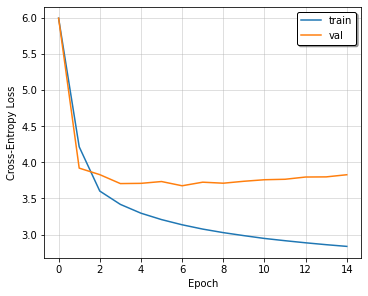

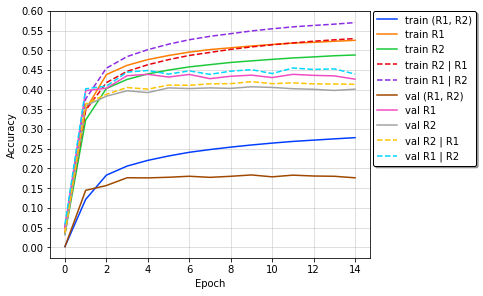

/usr/local/lib/python3.7/dist-packages/plotly/matplotlylib/mpltools.py:368: MatplotlibDeprecationWarning:


The is_frame_like function was deprecated in Matplotlib 3.1 and will be removed in 3.3.



Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 248 operations to synchronize with Neptune. Do not kill this process.


All 248 operations synced, thanks for waiting!
Model successfully logged to Neptune. Run logging stopped.


In [26]:
log_metadata_to_neptune(h)

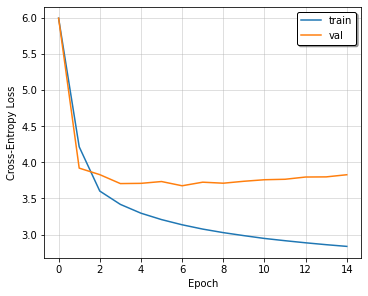

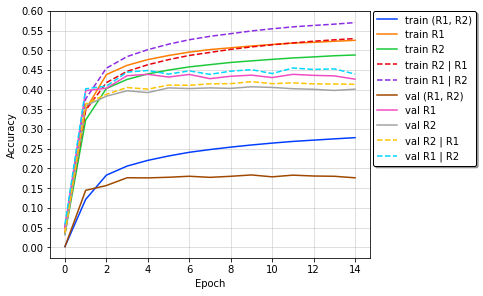

In [27]:
plot_training_history_v2(h["model_name"])

# Alarm when the model is done running.
# from IPython.display import Audio
# Audio(filename="run_done_alarm.mp3", autoplay=True)

## Testing

In [ ]:
# with open("data/3164_test_set_larger_keep_backbone.pickle", "rb") as f:
#     test_filenames = pickle.load(f)

In [ ]:
model_name = "m1_bigger_backbone_b1000_5atoms_matfact_1_lr_2_q_1"

MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

with open(f"{MODELS_DIRPATH}/{model_name}_metadata.pickle", "rb") as f:
    h = pickle.load(f)

In [ ]:
dirname, basename = os.path.split(h["data_path"])
n_train, preprocessing_name = basename.split("_train")
n_test = 4664 - int(n_train)

h["test_path"] = f"{dirname}/{n_test}_test{preprocessing_name}"
with open(h["test_path"], "rb") as f_test:
    test_filenames = pickle.load(f_test)

print("train path:", h["data_path"])
print("test path:", h["test_path"])

In [ ]:
# Check and set train_val_split.
with open(h["data_path"], "rb") as f_train:
    parsed_pdb_filenames = pickle.load(f_train)
                                       
with open(f"{MODELS_DIRPATH}/metrics_{model_name}.pickle", "rb") as f:
    history = pickle.load(f)

best_epoch = history["best_epoch"]
print("Best epoch:", best_epoch)
print("dataset: ", h["data_path"])
model_state = torch.load(f"{MODELS_DIRPATH}/{model_name}_epoch_{best_epoch}.pt")["model_state_dict"]

Best epoch: 15
dataset:  data/1500_train_set_larger_keep_backbone.pickle


In [ ]:
test_dataset, test_dataloader = get_test_dataloader(
                                                    parsed_pdb_filenames[:h["n_train"]], # 1350
                                                    BATCH_SIZE=1000,
                                                    DEVICE=DEVICE,
                                                    reshape_index=False,
                                                )


Testing data set includes 1350 pdbs with 2820802 environments.


In [ ]:
h["model_name"]

'm1_bigger_backbone_b1000_5atoms_matfact_1_lr_2'

In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

cavity_model_net.load_state_dict(model_state)

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"])
# optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

loss_val, test_res = _test(
    cavity_model_net,
    test_dataloader,
    loss_function,
    h["matfact_k"],
    h["output_shape"])

# Save test results
test_res["loss"] = loss_val

with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "wb") as f:
    pickle.dump(test_res, f)

In [ ]:
with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "rb") as f:
    test_res = pickle.load(f)

In [ ]:
freqs = test_res["pairres_count_true"]/test_res["pairres_count"]

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/np.sum(test_res["pairres_count_true"]),
                         f"{h['model_name']}_acc_per_pair_dist")

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/test_res["pairres_count"],
                         f"{h['model_name']}_acc_per_pair")

"Tracking metrics both on training and validation datasets can help you assess the risk of the model not performing well in production. The smaller the gap, the lower the risk"

# Autoencoder

In [ ]:
password = test_login_smtp_server()

In [ ]:
MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

RESUME = False

h = {

     "model_name": "m1_bigger_backbone_b1000_5atoms_3",
     "cav_model": test.Model_9,
     "n_atom_types": 5, # is n_input_channels
     "conv_layers": [16, 32, 64],
     "dense_layers": [1024, 128],
     "batchnorm": True,
     "dropout": False,
     "output_shape": 40,

     "pair_radius": 4.5,
     "grid_bin": 1.0,
     "grid_dim_xy": 9,
     "grid_dim_z": 18,
     "keep_backbone": True,

     "n_train": 1350,
     "n_val": None, # detemrined by TRAIN_VAL_SPLIT

     "weight": "", # either "aa" or "pair"
     "matfact_k": "",

     "epoch": 30,
     "batch_size": 1000,
     "lr": 2e-3,
     "patience_cutoff": 4,
     "optimizer": torch.optim.Adam,

     "data_path": "data/1500_train_set_larger_keep_backbone.pickle",

     "AE": "",
     "AE_path": "",
     "tag": "independence" # other tags: ae, matfact, full, weighted_aa, weighted_pair

}

h, parsed_pdb_filenames = set_and_save_metadata(h, RESUME)

## Training

In [ ]:
t1  = timeit.default_timer()
dataloader_train, dataset_train, dataloader_val, dataset_val = _train_val_split( # dataset already on GPU thanks to ToTensor.call() method
    parsed_pdb_filenames[:30], h["train_val_split"], DEVICE, h["batch_size"], reshape_index=False)
print(f"Finished fetching in {round(timeit.default_timer() - t1, 3)} seconds.")


Training data set includes 1350 pdbs with 2820802 environments.



Validation data set includes 150 pdbs with 335228 environments.
Finished fetching in 1540.314 seconds.


In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

# Load autoencoder
autoencoder_model = h["AE"].to(DEVICE)
autoencoder_model.load_state_dict(torch.load(h["AE_path"]))

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"]S)
optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

try:
    # Run model
    best_model_path = _train(
        dataloader_train,
        dataloader_val,
        cavity_model_net,
        autoencoder_model,
        loss_function,
        optimizer,
        h["epoch"],
        h["patience_cutoff"],
        MODELS_DIRPATH,
        h["model_name"],
        resume=RESUME,
    )

    # Send mail notification
    send_run_results(h, password, models_dirpath=MODELS_DIRPATH)

except Exception:
    error_msg = traceback.format_exc()
    send_run_failure(error_msg, passwoard, h["model_name"])

In [ ]:
log_metadata_to_neptune(h)

In [ ]:
plot_training_history_v2(h["model_name"])

# Alarm when the model is done running.
from IPython.display import Audio
Audio(filename="run_done_alarm.mp3", autoplay=True)

"Tracking metrics both on training and validation datasets can help you assess the risk of the model not performing well in production. The smaller the gap, the lower the risk"

## Testing

In [ ]:
# with open("data/3164_test_set_larger_keep_backbone.pickle", "rb") as f:
#     test_filenames = pickle.load(f)

In [ ]:
model_name = ""

MODELS_DIRPATH = "models/double_cav_models"
DEVICE = "cuda"

with open(f"{MODELS_DIRPATH}/{model_name}_metadata.pickle", "rb") as f:
    h = pickle.load(f)

In [ ]:
# Check and set train_val_split.
with open(h["data_path"], "rb") as f_train:
    parsed_pdb_filenames = pickle.load(f_train)
                                       
with open(f"{MODELS_DIRPATH}/metrics_{model_name}.pickle", "rb") as f:
    history = pickle.load(f)

best_epoch = history["best_epoch"]
print("Best epoch:", best_epoch)
print("dataset: ", h["data_path"])
model_state = torch.load(f"{MODELS_DIRPATH}/{model_name}_epoch_{best_epoch}.pt")["model_state_dict"]

Best epoch: 15
dataset:  data/1500_train_set_larger_keep_backbone.pickle


In [ ]:
test_dataset, test_dataloader = get_test_dataloader(
                                                    parsed_pdb_filenames[:h["n_train"]], # 1350
                                                    BATCH_SIZE=1000,
                                                    DEVICE=DEVICE,
                                                    reshape_index=False,
                                                )


Testing data set includes 1350 pdbs with 2820802 environments.


In [ ]:
h["model_name"]

'm1_bigger_backbone_b1000_5atoms_matfact_1_lr_2'

In [ ]:
# Define model
cavity_model_net = h["cav_model"](DEVICE, 
                                  grid_dim_xy=h["grid_dim_xy"],
                                  grid_dim_z=h["grid_dim_z"],
                                  n_atom_types=h["n_atom_types"]).to(DEVICE)

cavity_model_net.load_state_dict(model_state)

autoencoder_model = h["AE"].to(DEVICE)
autoencoder_model.load_state_dict(torch.load(h["AE_path"]))

loss_function = torch.nn.CrossEntropyLoss(weight=h["weight"]S)
# optimizer = h["optimizer"](cavity_model_net.parameters(), lr=h["lr"])

loss_val, test_res = _test(
    cavity_model_net,
    autoencoder_model,
    test_dataloader,
    loss_function,
    h["matfact_k"],
    h["output_shape"])

# Save test results
test_res["loss"] = loss_val

with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "wb") as f:
    pickle.dump(test_res, f)

In [ ]:
with open(f"{MODELS_DIRPATH}/{h['model_name']}_test_res", "rb") as f:
    test_res = pickle.load(f)

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/np.sum(test_res["pairres_count_true"]),
                         f"{h['model_name']}_acc_per_pair_dist")

In [ ]:
show_respair_acc_heatmap(test_res["pairres_count_true"]/test_res["pairres_count"],
                         f"{h['model_name']}_acc_per_pair")

"Tracking metrics both on training and validation datasets can help you assess the risk of the model not performing well in production. The smaller the gap, the lower the risk"